# Libraries

# **Time Series and Machine Learning Primer**

## time series and aplications

**Plotting a time series (I)**

In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, data and data2 are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

Note: This course assumes some familiarity with time series data, as well as how to use them in data analytics pipelines. For an introduction to time series, we recommend the Introduction to Time Series Analysis in Python and Visualizing Time Series Data with Python courses.

In [ ]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y="data_values", ax=axs[0])
data2.iloc[:1000].plot(y="data_values", ax=axs[1])
plt.show()

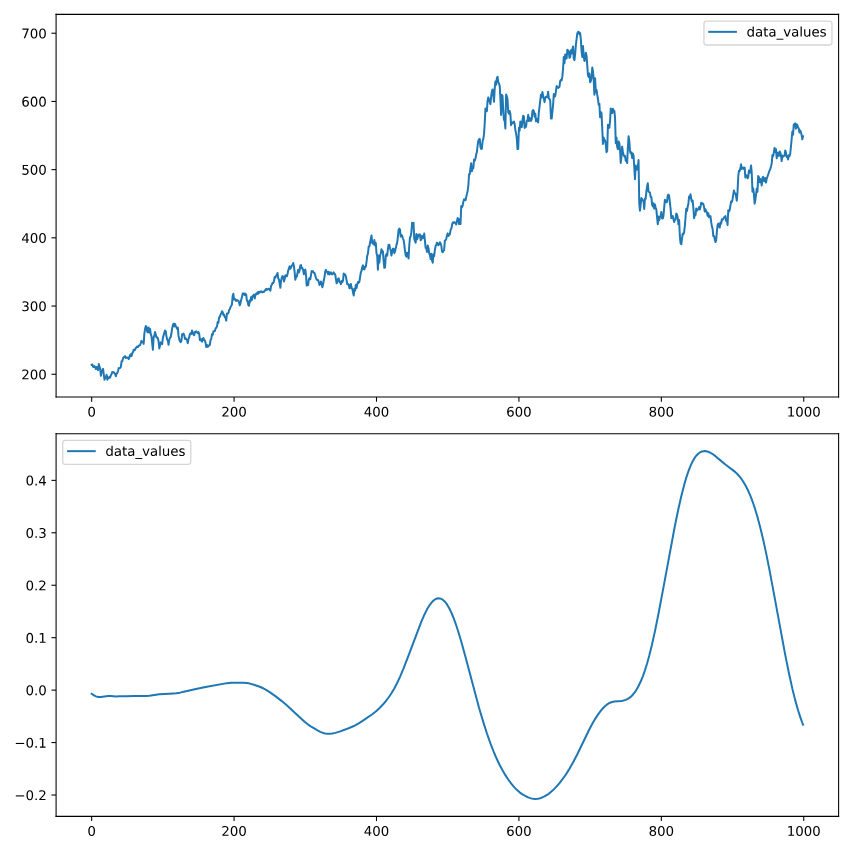

**Plotting a time series (II)**

You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [ ]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()

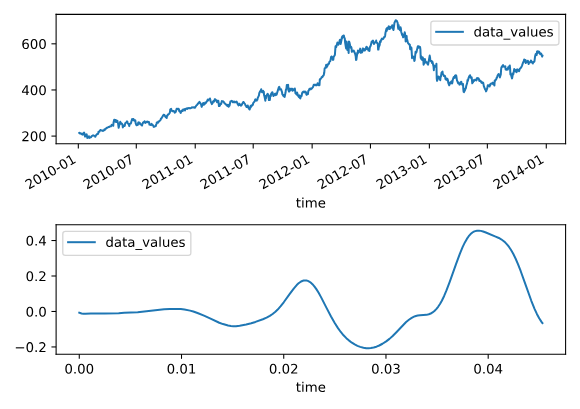

## Machine learning basics

**Fitting a simple model: classification**

In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

In [ ]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data.loc[:,["petal length (cm)","petal width (cm)"]]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

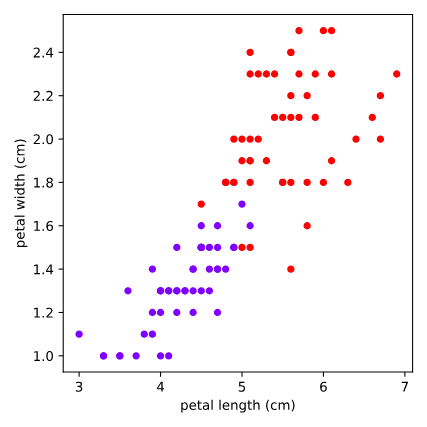

**Predicting using a classification model**

Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.

In [ ]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

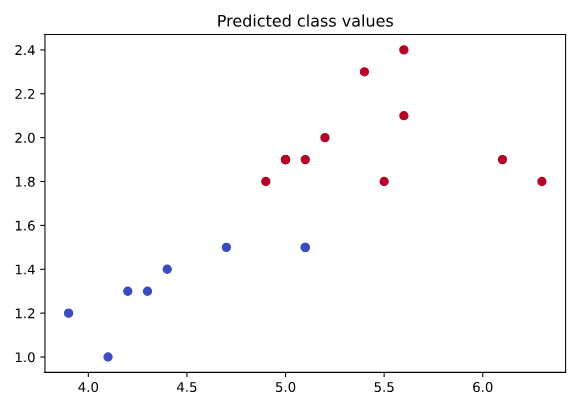

**Fitting a simple model: regression**

In this exercise, you'll practice fitting a regression model using data from the California housing market. A DataFrame called housing is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

"MedHouseVal": the median house value for California districts (in $100,000s of dollars)
"AveRooms" : average number of rooms per dwelling

In [ ]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = housing.loc[:,["MedHouseVal"]]
y = housing.loc[:,["AveRooms"]]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X,y)

In [ ]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1,1))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

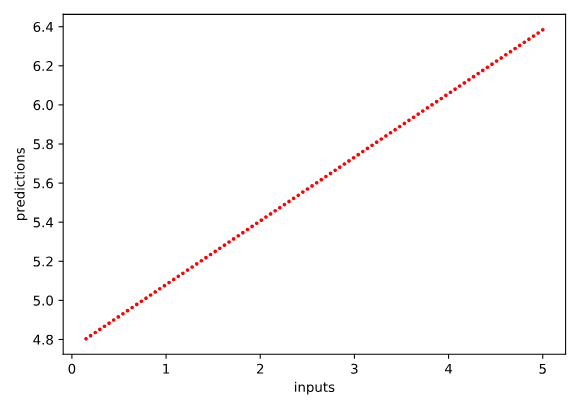

## Machine learning and time series data

**Inspecting the classification data**

In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public Kaggle competi

https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds?select=set_b.csvtion.

In [5]:
import librosa as lr
from glob import glob

In [36]:
archivo="./audio/audio_munged.hdf5"
data_dir="./audio/"

In [37]:
# List all the hdf5 files in the folder
audio_files = glob(data_dir + '*.hdf5')

In [38]:
audio_files

['./audio\\audio_munged.hdf5', './audio\\audio_munged2.hdf5']

In [ ]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

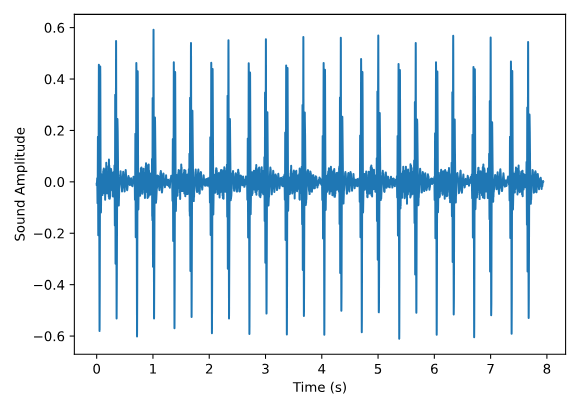

**Inspecting the regression data**

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one anoth
https://www.kaggle.com/datasets/dgawlik/nyseer.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Read in the data
data = pd.read_csv('./prices/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())


           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


In [65]:
# Pivotear el DataFrame
pivot_df = data.pivot(columns='symbol', values='close')

In [66]:
stocks_values=pivot_df.loc[:,["AAPL","FB","NFLX","V","XOM"]]

In [67]:
stocks_values

symbol,AAPL,FB,NFLX,V,XOM
date,,,,,
2010-01-04,214.009998,NaN,53.479999,88.139999,69.150002
2010-01-05,214.379993,NaN,51.510001,87.129997,69.419998
2010-01-06,210.969995,NaN,53.319999,85.959999,70.019997
2010-01-07,210.580000,NaN,52.400001,86.760002,69.800003
2010-01-08,211.980005,NaN,53.300002,87.000000,69.519997
...,...,...,...,...,...
2016-12-23,116.519997,117.269997,125.589996,78.150002,90.709999
2016-12-27,117.260002,118.010002,128.350006,78.349998,90.750000
2016-12-28,116.760002,116.919998,125.889999,78.300003,90.300003


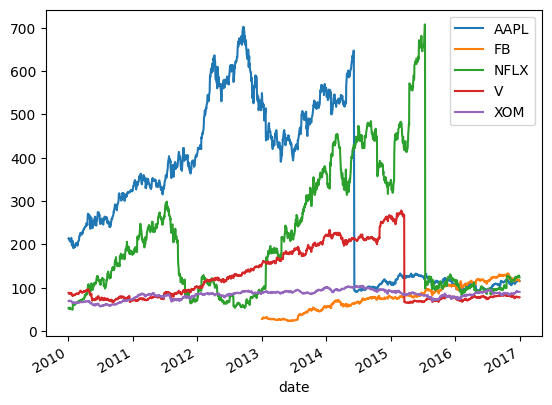

In [68]:
# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in stocks_values.columns:
    stocks_values[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

# Time Series as Inputs to a Model

## Classifying a time series

**Many repetitions of sounds**

In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

In [ ]:
# Importar matplotlib para gráficos
import matplotlib.pyplot as plt
import numpy as np

# Crear una figura con una matriz de 3 filas y 2 columnas de subgráficos
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calcular el array de tiempo para los datos de audio
# np.arange(0, len(normal)) crea un array de índices de muestra desde 0 hasta la longitud de 'normal'
# Dividiendo por 'sfreq' convierte los índices de muestra en tiempo en segundos
time = np.arange(0, len(normal)) / sfreq

# Apilar los datos de audio normal y anormal horizontalmente y luego transponerlos
# Esto es para poder iterar fácilmente sobre ellos y graficarlos
stacked_audio = np.hstack([normal, abnormal]).T

# Iterar sobre cada archivo de audio y cada objeto ax (subgráfico) para graficar
# .T.ravel() transpone la matriz de ejes y luego la aplana en un vector de 1D para facilitar la iteración
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    # Graficar el archivo de audio (iaudio) contra el tiempo en el subgráfico correspondiente (ax)
    ax.plot(time, iaudio)

# Llamar a la función para mostrar la figura y añadir títulos a los subgráficos
show_plot_and_make_titles()


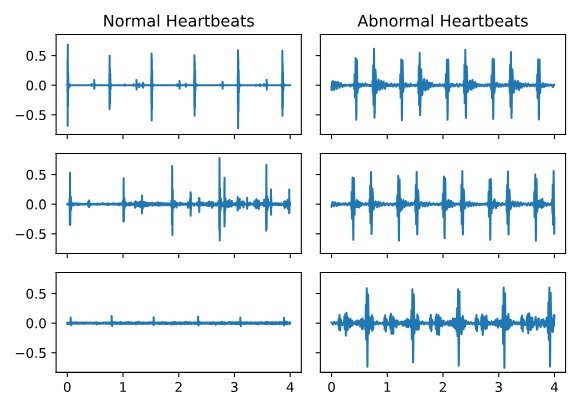

**Invariance in time**

While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.

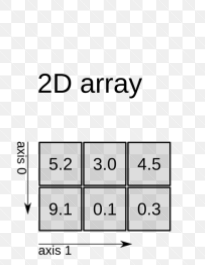

In [ ]:
# Average across the audio files of each DataFrame
#con esto estamos sacando la media de todas las columnas 
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

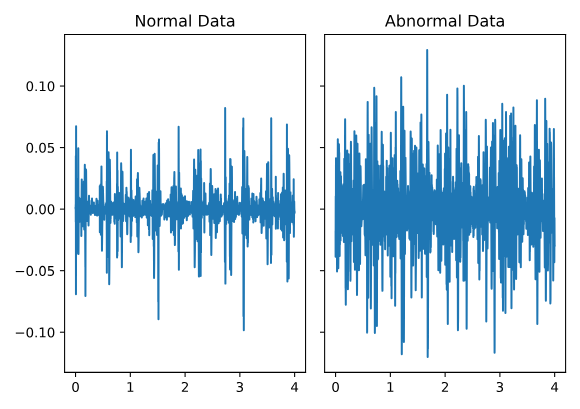

**Build a classification model**

While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

In [ ]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
"""
X_train.shape
Out[4]:
(42, 8820)
In [6]:
normal.shape
Out[6]:
(8820, 29)
In [7]:
abnormal.shape
Out[7]:
(8820, 31)

nos damos cuenta que para este caso xtrain tiene como filas cada muestra y como columna los timestamps 

"""
model = LinearSVC()
model.fit(X_train,y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))
#the output de esto no nos da buenos resultados debido Tenga en cuenta que sus predicciones no fueron tan buenas. Esto se debe a que las características que estás utilizando como entradas para el modelo (datos sin procesar) no son muy buenas para diferenciar clases. A continuación, explorará cómo calcular algunas características más complejas que pueden mejorar los resultados.

## Improving features for classification

**Calculating the envelope of sound**
    
One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

A heartbeat file is available in the variable audio.

In [ ]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

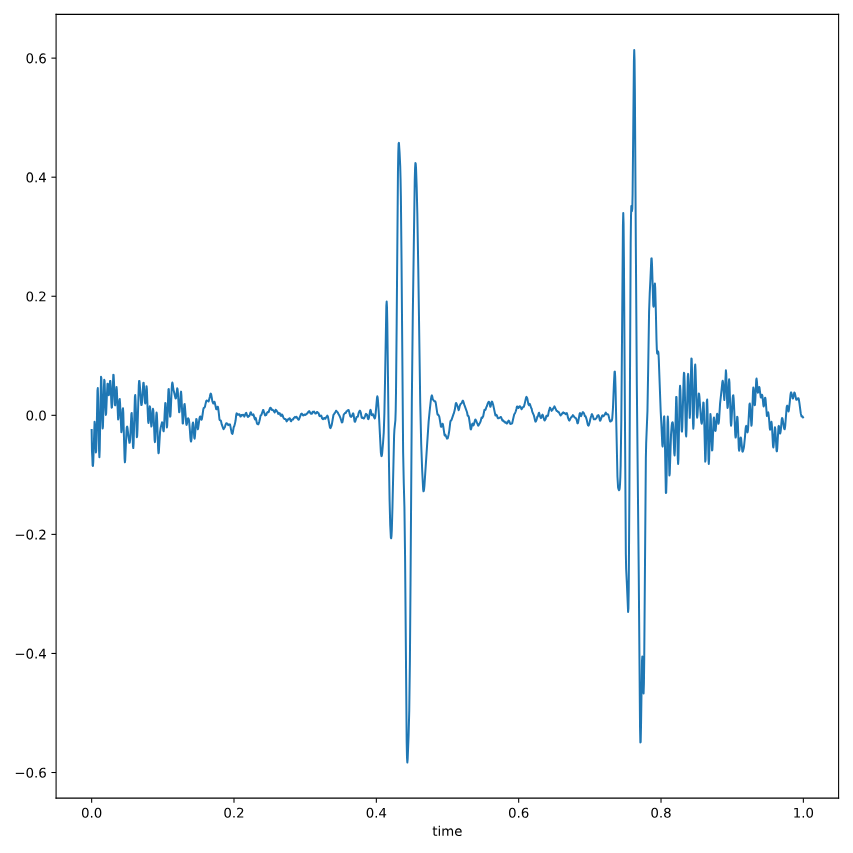

In [ ]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

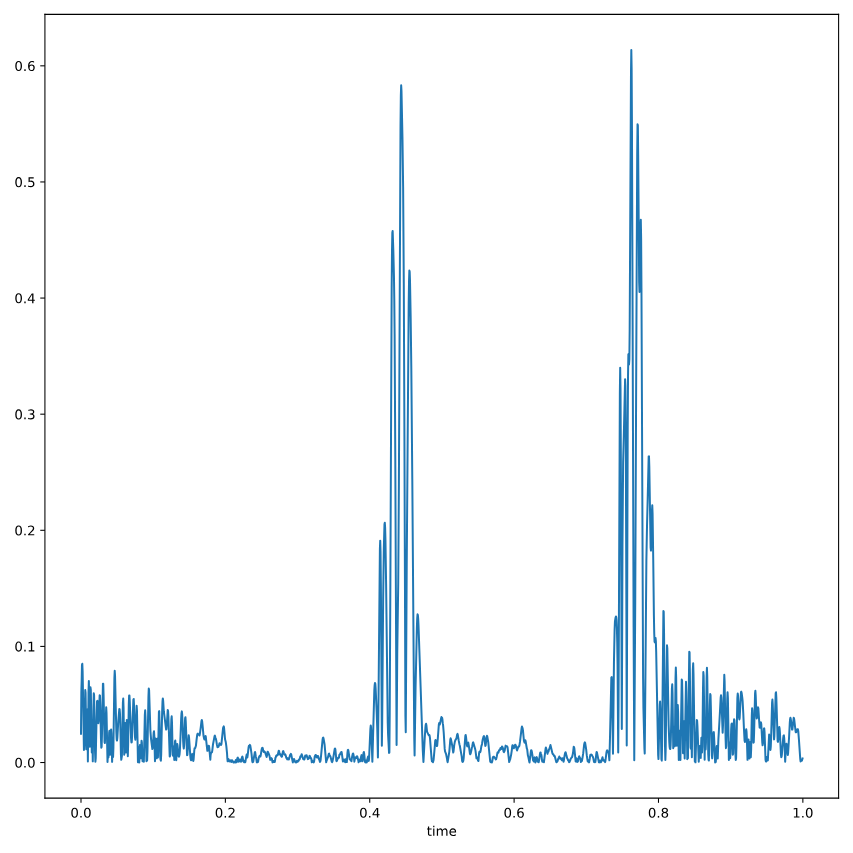

In [ ]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

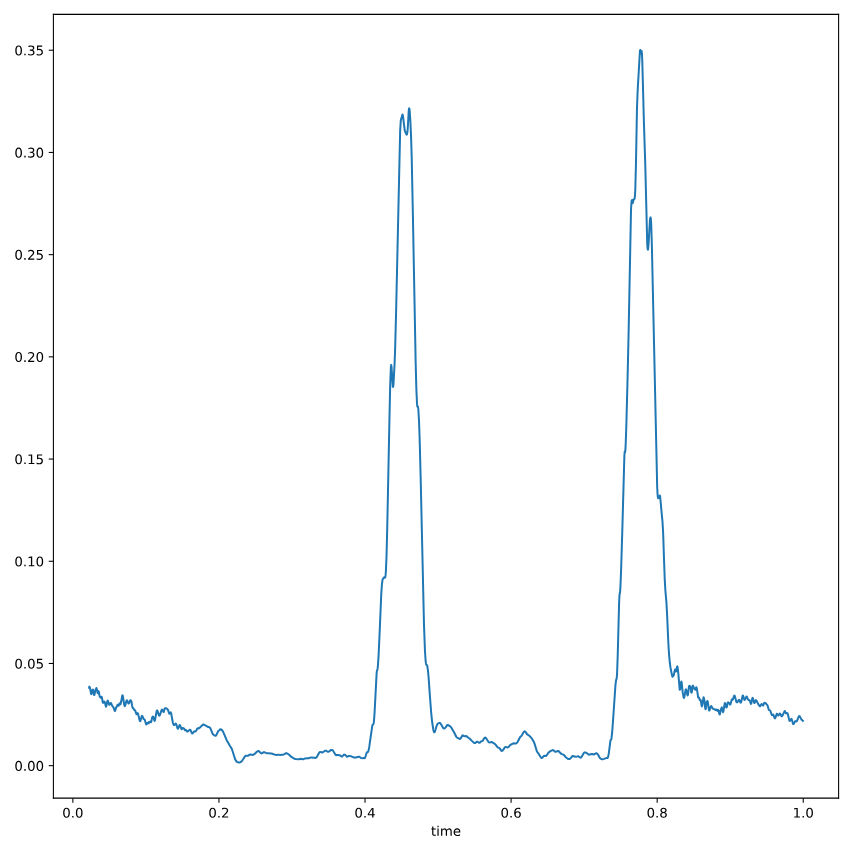

**Calculating features from the envelope**

Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

audio_rectified_smooth from the previous exercise is available in your workspace.

In [ ]:
#This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data).
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model,X, y, cv=5)
print(np.mean(percent_score))
"""
 output:
    0.7166666666666667
"""

**Derivative features: The tempogram**

One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the envelope calculation you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use librosa to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

Note that librosa functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the .values attribute.

In [ ]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

"""
In [1]:
tempos.shape
Out[1]:
(60, 138)
In [2]:
tempos_mean.shape
Out[2]:
(60,)
"""

In [ ]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
"""
output:
    0.5
    Tenga en cuenta que es posible que su poder predictivo no haya aumentado (porque este conjunto de datos es bastante pequeño),
    pero ahora tiene una representación de características de audio más rica que su modelo puede usar.
"""

## The spectogram

**Spectrograms of heartbeat audio**

Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.

We've loaded a single heartbeat sound in the variable audio.

In [ ]:
# Importar la función stft (Short-Time Fourier Transform) de la biblioteca librosa.
from librosa.core import stft

# Preparar los parámetros para la Transformada de Fourier de Tiempo Corto (STFT).
# HOP_LENGTH es el número de muestras entre el inicio de cada ventana de STFT.
HOP_LENGTH = 2**4  # Equivalente a 16 muestras.

# Calcular la STFT del audio. 
# stft toma como entrada la señal de audio y devuelve una matriz compleja que representa 
# la amplitud y la fase de las componentes de frecuencia a lo largo del tiempo.
# Parámetros:
# - audio: señal de audio de entrada.
# - hop_length: el número de muestras entre el inicio de cada ventana.
# - n_fft: el tamaño de la ventana de FFT (número de puntos en la FFT).
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)  # n_fft es 128.


In [ ]:
# Importar la función amplitude_to_db de la biblioteca librosa.
from librosa.core import amplitude_to_db
# Importar la función specshow de la biblioteca librosa para visualizar espectrogramas.
from librosa.display import specshow
# Importar la biblioteca matplotlib para la visualización.
import matplotlib.pyplot as plt

# Convertir las amplitudes del espectrograma a decibelios (dB).
# amplitude_to_db toma una matriz de magnitudes y las convierte a una escala logarítmica.
spec_db = amplitude_to_db(spec)

# Comparar el audio en bruto con el espectrograma del audio.
# Crear una figura con 2 subgráficos (subplots) organizados en una columna (2, 1).
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)  # figsize define el tamaño de la figura.

# En el primer subgráfico, trazar la señal de audio en el dominio del tiempo.
# time debe ser un array que contenga los valores de tiempo correspondientes a la señal de audio.
axs[0].plot(time, audio)
axs[0].set_title('Audio Signal')  # Título del primer subgráfico.
axs[0].set_xlabel('Time (s)')  # Etiqueta del eje x.
axs[0].set_ylabel('Amplitude')  # Etiqueta del eje y.

# En el segundo subgráfico, mostrar el espectrograma en decibelios.
# specshow visualiza el espectrograma.
# Parámetros:
# - spec_db: el espectrograma en decibelios.
# - sr: la frecuencia de muestreo de la señal de audio.
# - x_axis: el tipo de eje x ('time' para tiempo).
# - y_axis: el tipo de eje y ('hz' para frecuencia en Hz).
# - hop_length: el número de muestras entre el inicio de cada ventana.
# - ax: el eje donde se dibuja el espectrograma.
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=axs[1])
axs[1].set_title('Spectrogram')  # Título del segundo subgráfico.
axs[1].set_xlabel('Time (s)')  # Etiqueta del eje x.
axs[1].set_ylabel('Frequency (Hz)')  # Etiqueta del eje y.

# Mostrar la figura con los dos subgráficos.
plt.show()


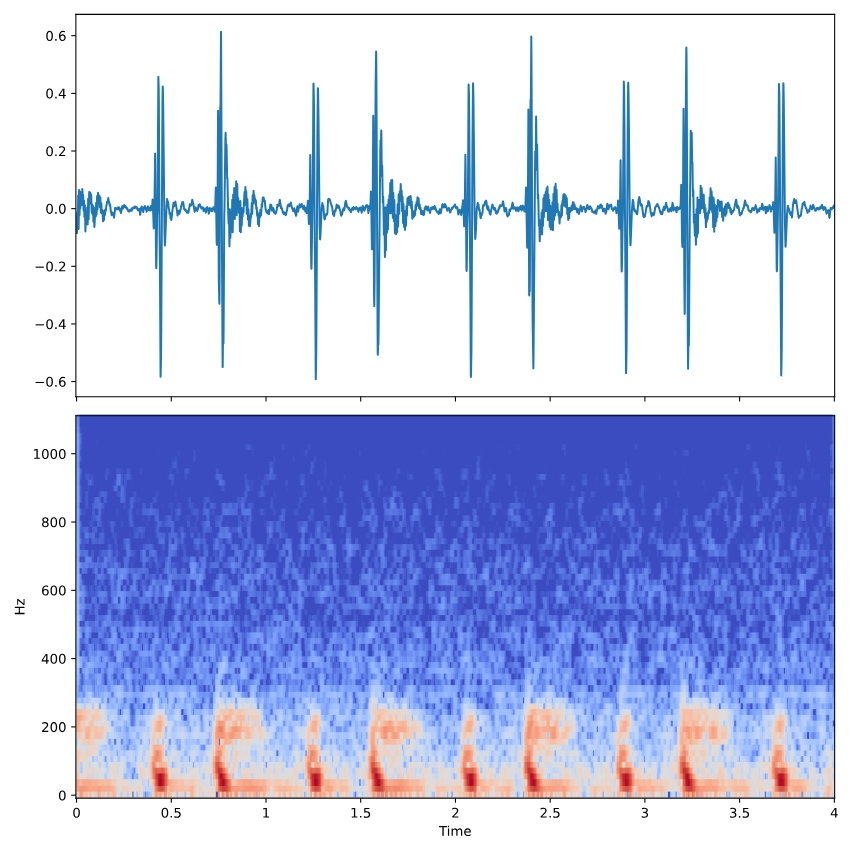

**Engineering spectral features**

As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.

The spectogram spec from the previous exercise is available in your workspace.

In [ ]:
# Importar la biblioteca librosa con un alias (lr).
import librosa as lr

# Calcular el centroide espectral y el ancho de banda espectral para el espectrograma.
# El centroide espectral indica el centro de masa del espectro de frecuencias.
# El ancho de banda espectral mide el rango de frecuencias en torno al centroide espectral.

# Calcular el ancho de banda espectral.
# lr.feature.spectral_bandwidth calcula el ancho de banda espectral de cada cuadro del espectrograma.
# Parámetros:
# - S: el espectrograma (matriz de magnitudes o valores complejos).
# El resultado es un array donde cada valor representa el ancho de banda espectral de un cuadro.
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]

# Calcular el centroide espectral.
# lr.feature.spectral_centroid calcula el centroide espectral de cada cuadro del espectrograma.
# Parámetros:
# - S: el espectrograma (matriz de magnitudes o valores complejos).
# El resultado es un array donde cada valor representa el centroide espectral de un cuadro.
centroids = lr.feature.spectral_centroid(S=spec)[0]


In [ ]:
# Importar la función amplitude_to_db de la biblioteca librosa para convertir amplitudes a decibelios.
from librosa.core import amplitude_to_db

# Importar la función specshow de la biblioteca librosa para visualizar espectrogramas.
from librosa.display import specshow

# Convertir el espectrograma a decibelios para su visualización.
# amplitude_to_db toma una matriz de magnitudes y las convierte a una escala logarítmica (dB).
spec_db = amplitude_to_db(spec)

# Crear una figura y un solo subgráfico (ax) para mostrar el espectrograma y las características adicionales.
fig, ax = plt.subplots(figsize=(10, 5))  # figsize define el tamaño de la figura en pulgadas.

# Visualizar el espectrograma en decibelios usando specshow.
# Parámetros:
# - spec_db: el espectrograma en decibelios.
# - sr: la frecuencia de muestreo de la señal de audio (sfreq).
# - x_axis: el tipo de eje x ('time' para tiempo).
# - y_axis: el tipo de eje y ('hz' para frecuencia en Hz).
# - hop_length: el número de muestras entre el inicio de cada ventana (HOP_LENGTH).
# - ax: el eje donde se dibuja el espectrograma.
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)

# Dibujar el centroide espectral sobre el espectrograma.
# times_spec debe ser un array que contenga los valores de tiempo correspondientes a cada cuadro del espectrograma.
ax.plot(times_spec, centroids, color='w')  # La línea blanca representa el centroide espectral.

# Rellenar el área entre el centroide espectral menos la mitad del ancho de banda y el centroide espectral más la mitad del ancho de banda.
# Esto visualiza el rango de frecuencias alrededor del centroide espectral.
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5, color='w')

# Establecer el límite del eje y para visualizar hasta 6000 Hz.
ax.set(ylim=[None, 6000])

# Mostrar la figura con el espectrograma y las características adicionales.
plt.show()


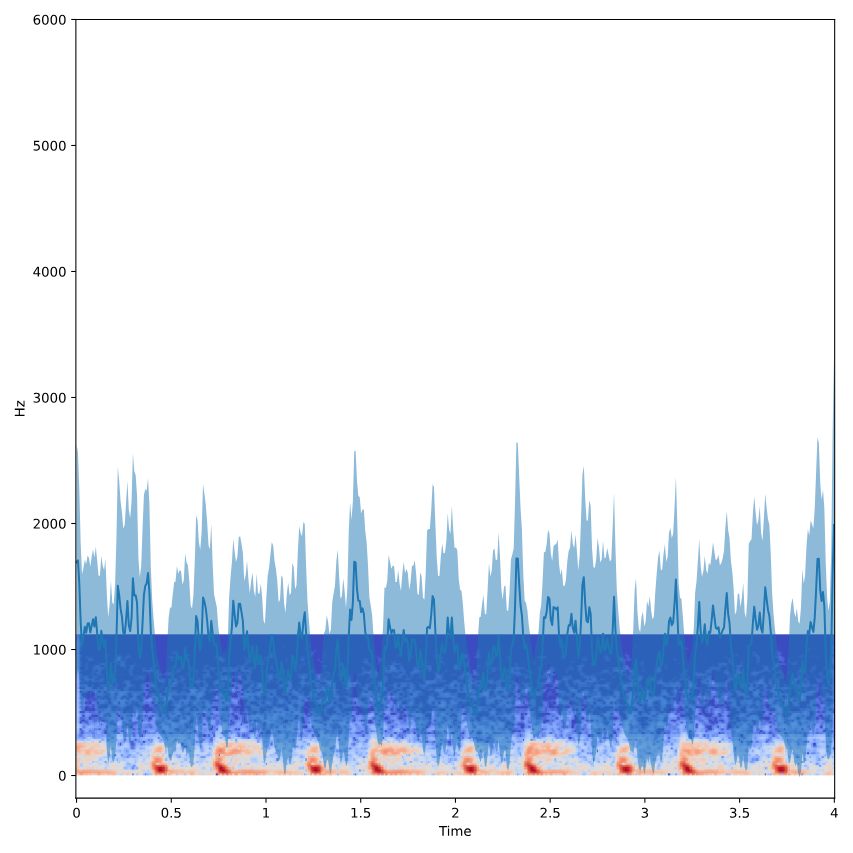

**Combining many features in a classifier**

You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.

The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.

In [ ]:
# Inicializar listas vacías para almacenar los anchos de banda y los centroides espectrales.
bandwidths = []
centroids = []

# Iterar sobre cada espectrograma en la lista de espectrogramas.
for spec in spectrograms:
    # Calcular el ancho de banda espectral medio para el espectrograma actual.
    # lr.feature.spectral_bandwidth(S=spec) devuelve el ancho de banda espectral para cada cuadro del espectrograma.
    # np.mean() calcula el valor promedio de estos anchos de banda.
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    
    # Calcular el centroide espectral medio para el espectrograma actual.
    # lr.feature.spectral_centroid(S=spec) devuelve el centroide espectral para cada cuadro del espectrograma.
    # np.mean() calcula el valor promedio de estos centroides.
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    
    # Añadir los valores calculados a las listas correspondientes.
    bandwidths.append(this_mean_bandwidth)  # Añadir el ancho de banda medio a la lista de anchos de banda.
    centroids.append(this_mean_centroid)    # Añadir el centroide medio a la lista de centroides.


In [ ]:
# Crear arrays X e y para el modelo
# np.column_stack apila las columnas especificadas en un solo array 2D.
# En este caso, se combinan los arrays means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths y centroids en una matriz X.
# Cada columna representa una característica diferente y cada fila representa una instancia (un espectrograma).

X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
"""
In [4]:
X.shape
Out[4]:
(60, 8)
"""
# Crear el array y que contiene las etiquetas.
# labels.reshape(-1, 1) convierte el array labels en una columna (si no lo está ya), donde cada fila corresponde a una etiqueta.
y = labels.reshape(-1, 1)

# Ajustar el modelo y calcular el puntaje utilizando validación cruzada
# cross_val_score evalúa el modelo utilizando validación cruzada.
# Parámetros:
# - model: el modelo a evaluar.
# - X: la matriz de características.
# - y: el array de etiquetas.
# - cv: el número de divisiones para la validación cruzada (en este caso, 5).
percent_score = cross_val_score(model, X, y, cv=5)

# Imprimir el puntaje promedio de la validación cruzada.
# np.mean(percent_score) calcula el promedio de los puntajes obtenidos en las diferentes divisiones de la validación cruzada.
print(np.mean(percent_score))


In [ ]:
"""
Calculó muchas características diferentes del audio y combinó cada una de ellas bajo el supuesto de que proporcionan información independiente que se puede utilizar en la clasificación. 
Es posible que haya notado que la precisión de sus modelos variaba mucho al utilizar diferentes conjuntos de funciones. Este capítulo se centró en crear nuevas "características" a partir de datos sin procesar y no en obtener la mejor precisión.
Para mejorar la precisión, es necesario encontrar las funciones adecuadas que proporcionen información relevante y también crear modelos a partir de datos mucho más grandes.
<script.py> output:
    0.4833333333333333
"""

# Predicting Time Series Data

## Predicting data over time

**Introducing the dataset**

As mentioned in the video, you'll deal with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices. You'll visualize the raw data for the two companies, then generate a scatter plot showing how the values for each company compare with one another. Finally, you'll add in a "time" dimension to your scatter plot so you can see how this relationship changes over time.

The data has been loaded into a DataFrame called prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data
data = pd.read_csv('./prices/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())


           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


In [3]:
# Pivotear el DataFrame
pivot_df = data.pivot(columns='symbol', values='close')
stocks_values=pivot_df.loc[:,["EBAY","YHOO"]]
stocks_values.head()

symbol,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


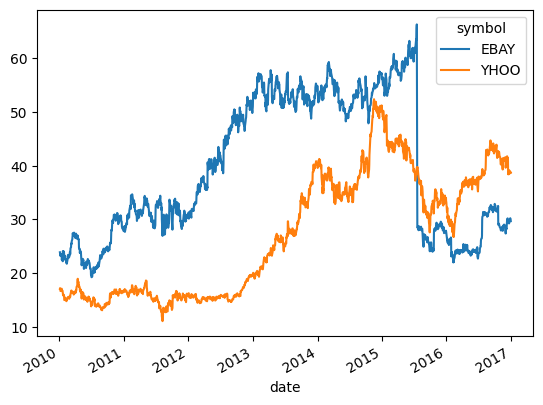

In [4]:
# Trama los valores de las acciones en el tiempo.

# stocks_values es un DataFrame que contiene los valores de las acciones a lo largo del tiempo.
# plot() es un método de DataFrame que traza los datos. 
# Por defecto, traza cada columna frente a su índice (que en este caso es el tiempo).
stocks_values.plot()

# Muestra la trama.
plt.show()


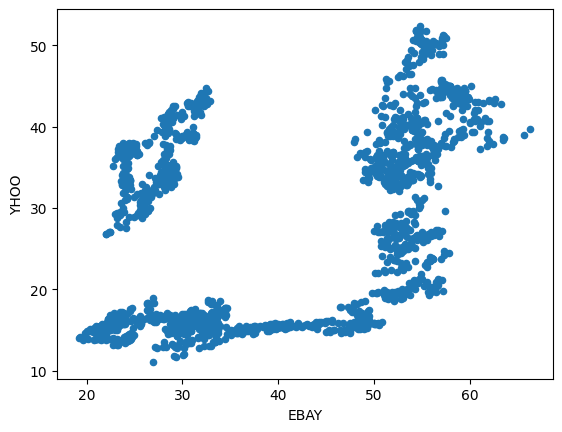

In [5]:
# Scatterplot con una empresa por eje

# stocks_values es un DataFrame que contiene los valores de las acciones de varias empresas.
# plot.scatter() es un método de DataFrame que traza un gráfico de dispersión.
# Se especifica que los valores de la empresa "EBAY" se colocarán en el eje x y los de la empresa "YHOO" en el eje y.
stocks_values.plot.scatter(x="EBAY", y="YHOO")

# Muestra el gráfico de dispersión.
plt.show()


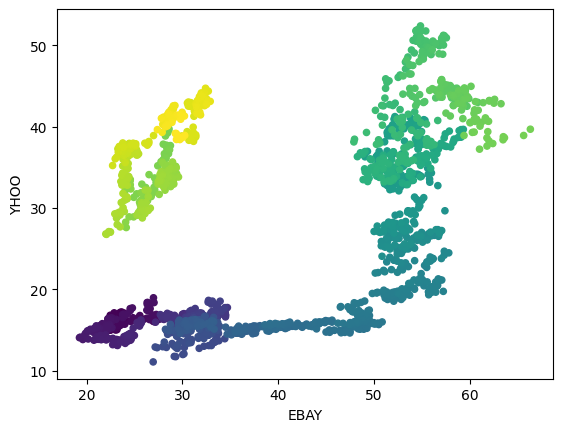

In [6]:
# Scatterplot con color relacionado con el tiempo (índice)

# stocks_values es un DataFrame que contiene los valores de las acciones de varias empresas.
# plot.scatter() es un método de DataFrame que traza un gráfico de dispersión.
# Se especifica que los valores de la empresa "EBAY" se colocarán en el eje x y los de la empresa "YHOO" en el eje y.
# El argumento 'c' se utiliza para especificar el color de los puntos. En este caso, se utiliza el índice del DataFrame (el tiempo).
# cmap=plt.cm.viridis se utiliza para especificar el mapa de colores. En este caso, se utiliza el mapa de colores 'viridis'.
# colorbar=False se utiliza para desactivar la barra de colores en el gráfico.
stocks_values.plot.scatter('EBAY', 'YHOO', c=stocks_values.index, cmap=plt.cm.viridis, colorbar=False)

# Muestra el gráfico de dispersión.
plt.show()


**Fitting a simple regression model**

Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:

ebay: "EBAY"
nvidia: "NVDA"
yahoo: "YHOO"
apple: "AAPL"
We'll use these columns to define the input/output arrays in our model.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read in the data
data = pd.read_csv('./prices/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


In [9]:
# Pivotear el DataFrame
all_prices = data.pivot(columns='symbol', values='close')
all_prices.head()

symbol,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[["EBAY","NVDA","YHOO"]]
y = all_prices[["AAPL"]]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[  -0.55495235   -0.9912733  -322.41700994]


**Visualizing predicted values**

When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-3308.668763845165


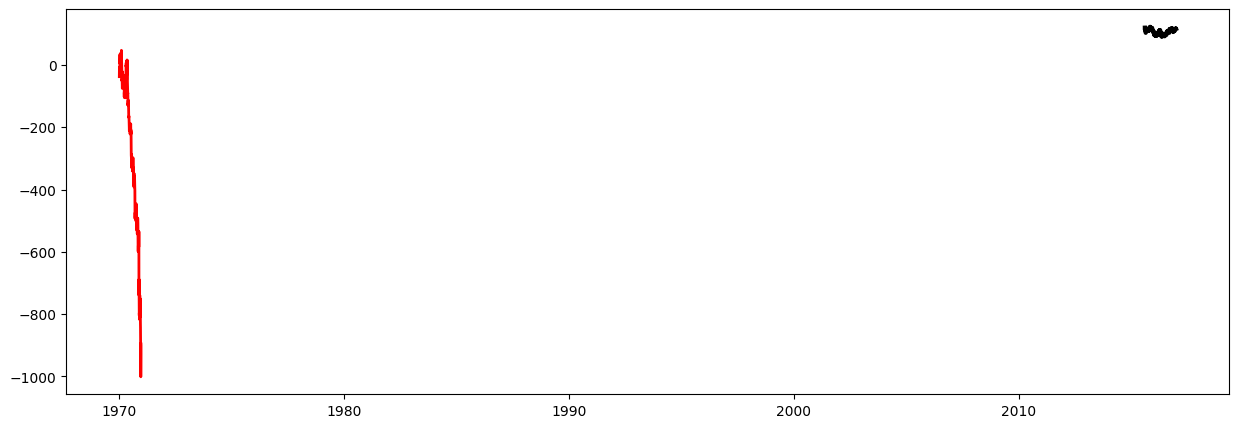

In [12]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

**Visualizing messy data**

Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

The data has been loaded into a DataFrame called prices.

In [13]:
prices= all_prices[["EBAY","NVDA","YHOO"]]
prices

symbol,EBAY,NVDA,YHOO
date,,,
2010-01-04,23.900000,18.490000,17.100000
2010-01-05,23.650000,18.760000,17.230000
2010-01-06,23.500000,18.879999,17.170000
2010-01-07,23.229998,18.510000,16.700001
2010-01-08,23.509999,18.549999,16.700001
...,...,...,...
2016-12-23,29.790001,109.779999,38.660000
2016-12-27,30.240000,117.320000,38.919998
2016-12-28,30.010000,109.250000,38.730000


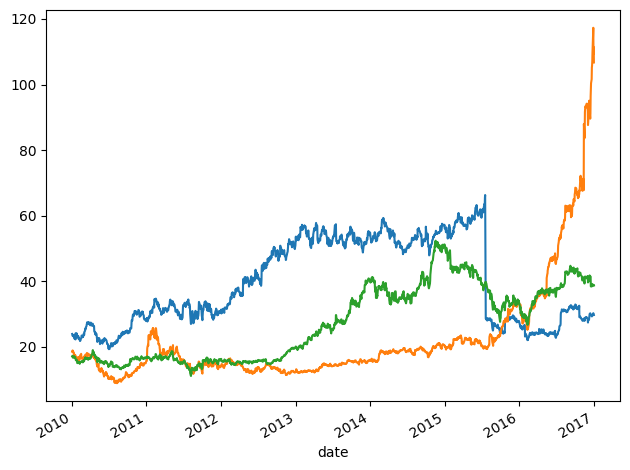

symbol
EBAY    0
NVDA    0
YHOO    0
dtype: int64


In [14]:
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

hacemos una suposiscion 


puede ver que claramente faltan fragmentos de tiempo en sus datos. También parece haber algunos "saltos" en los datos. ¿Cómo puedes lidiar con esto?
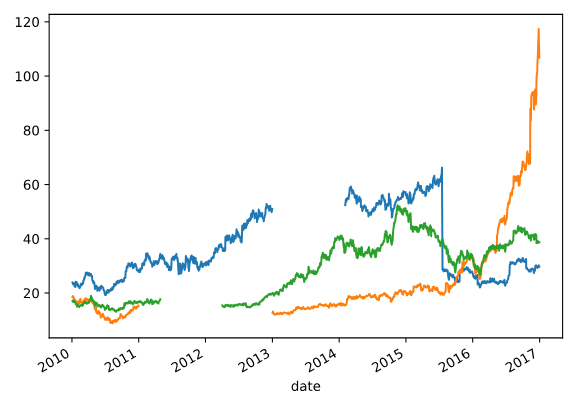

**Imputing missing values**

When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data points and plot them.

A single time series has been loaded into a DataFrame called prices.

In [15]:
# Importar la biblioteca matplotlib para graficar
import matplotlib.pyplot as plt

# Definir una función que utilizaremos para interpolar y graficar datos
def interpolate_and_plot(prices, interpolation):
    
    # Crear una máscara booleana para los valores faltantes (NaN)
    missing_values = prices.isna()
    
    # Interpolar los valores faltantes en 'prices' usando el método especificado en 'interpolation'
    prices_interp = prices.interpolate(interpolation)
    
    # Graficar los resultados, destacando los valores interpolados en negro
    fig, ax = plt.subplots(figsize=(10, 5))  # Crear una figura y un eje para la gráfica
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)  # Graficar todos los datos interpolados en negro con transparencia
    
    # Ahora graficar los valores interpolados encima en rojo
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)  # Graficar los valores que fueron interpolados en rojo con una línea más gruesa
    plt.show()  # Mostrar la gráfica


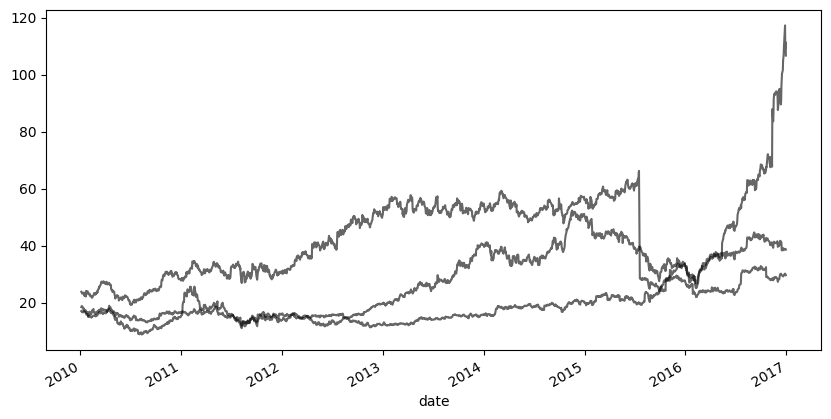

In [16]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

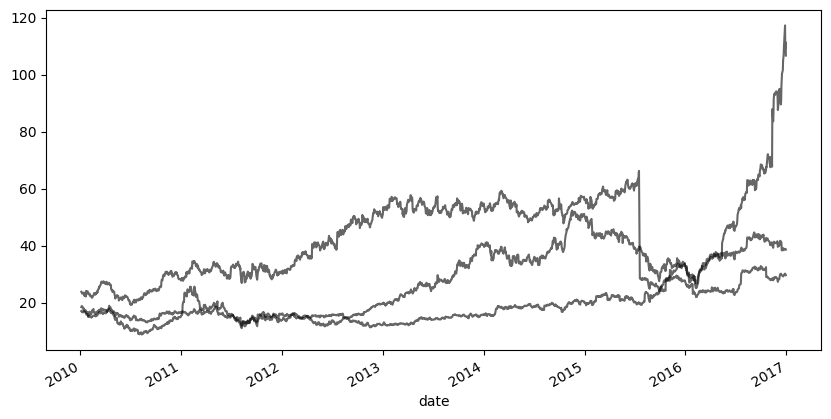

In [17]:
# Interpolate linearly
interpolation_type = "linear"
interpolate_and_plot(prices, interpolation_type)

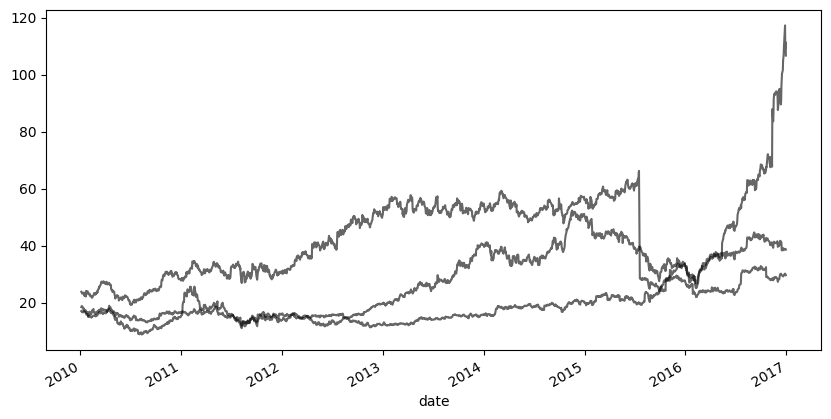

In [18]:
# Interpolate with a quadratic function
interpolation_type = "quadratic"
interpolate_and_plot(prices, interpolation_type)

**Transforming raw data**

In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_12584\2316554333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = series[-1]


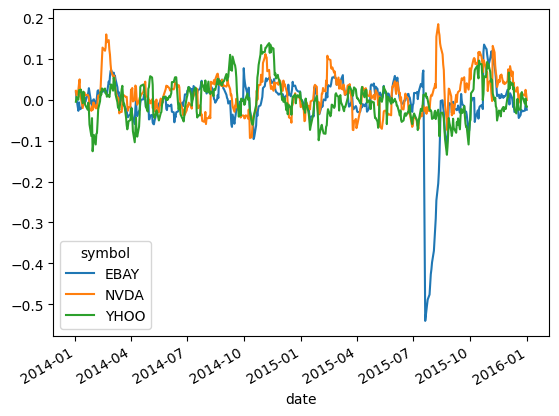

In [19]:
import numpy as np
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib para poder mostrar el gráfico

# Definición de una función personalizada para calcular el cambio porcentual
def percent_change(series):
    # Toma todos los valores de la serie excepto el último valor de la ventana actual
    previous_values = series[:-1]
    # Toma el último valor de la ventana actual
    last_value = series[-1]

    # Calcula la diferencia porcentual entre el último valor y la media de los valores anteriores
    # (Último valor - Media de los valores anteriores) / Media de los valores anteriores
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Aplica la función personalizada a una serie de precios usando una ventana móvil de 20 períodos
# 'prices' es una serie de precios (por ejemplo, de acciones) en la que se quiere calcular el cambio porcentual
prices_perc = prices.rolling(20).aggregate(percent_change)

# Selecciona los datos del periodo entre 2014 y 2015 y crea un gráfico
prices_perc.loc["2014":"2015"].plot()
# Muestra el gráfico en pantalla
plt.show()


**Handling outliers**

In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

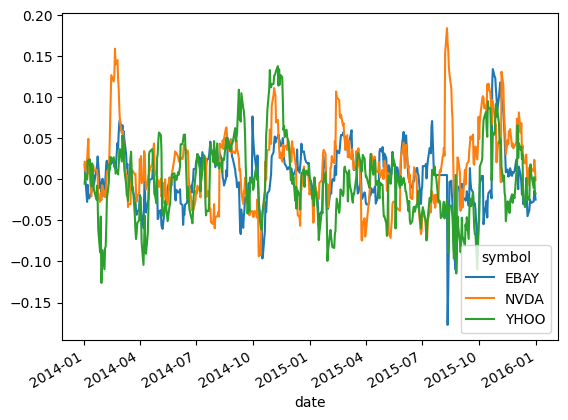

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de una función para reemplazar valores atípicos en una serie de datos
def replace_outliers(series):
    # Calcula la diferencia absoluta de cada punto de datos respecto a la media de la serie
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Crea una máscara booleana para identificar los puntos de datos que están a más de 3 desviaciones estándar de la media
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Reemplaza los valores atípicos (identificados por la máscara) con la mediana de la serie
    series[this_mask] = np.nanmedian(series)
    return series

# Aplica la función de preprocesamiento `replace_outliers` a cada columna de la serie temporal `prices_perc`
# `prices_perc` es una serie temporal (por ejemplo, de precios de acciones) a la que se le aplicará el tratamiento de valores atípicos
prices_perc = prices_perc.apply(replace_outliers)

# Selecciona los datos del periodo entre 2014 y 2015 de la serie procesada `prices_perc` y crea un gráfico
prices_perc.loc["2014":"2015"].plot()

# Muestra el gráfico en pantalla
plt.show()

**Engineering multiple rolling features at once**

Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.



C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_12584\4046416830.py:8: FutureWarning: The provided callable <function min at 0x000001A51FC0C0E0> is currently using Rolling.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_12584\4046416830.py:8: FutureWarning: The provided callable <function max at 0x000001A51FBE3F60> is currently using Rolling.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_12584\4046416830.py:8: FutureWarning: The provided callable <function mean at 0x000001A51FC0C9A0> is currently using Rolling.mean. In a future version of pandas, the provided callable will be used directly

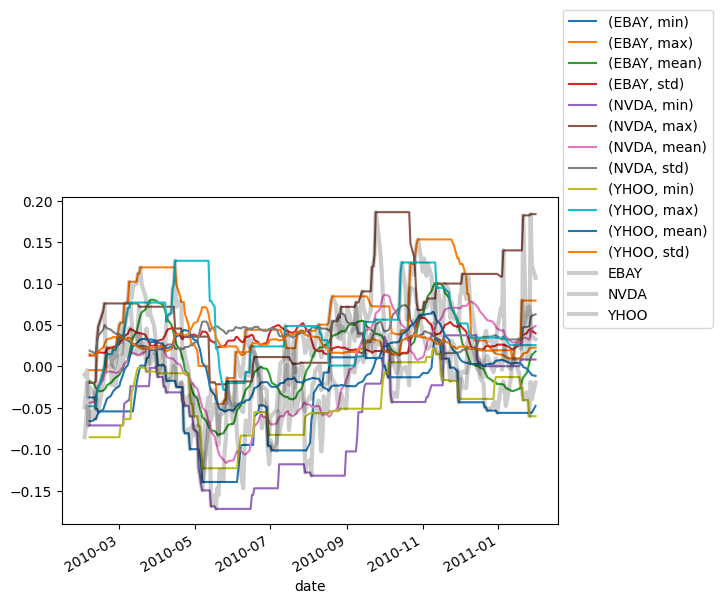

In [21]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

**Percentiles and partial functions**

In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy.

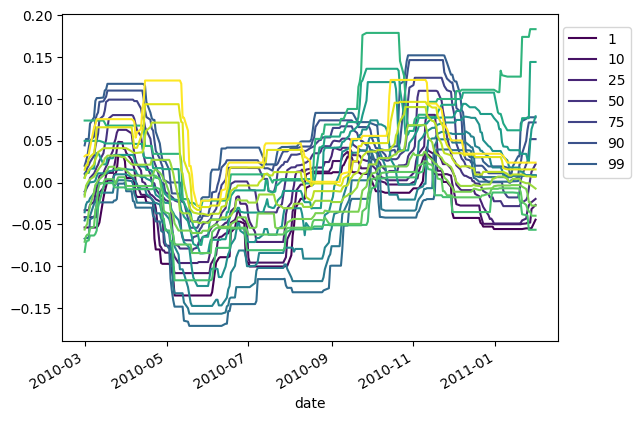

In [22]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

**Using "date" information**

It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In this exercise, you'll extract these date/time based features. A single time series has been loaded in a variable called prices.

In [24]:
# Assuming prices_perc is your DataFrame and the index is datetime
prices_perc['day_of_week'] = prices_perc.index.weekday
prices_perc['week_of_year'] = prices_perc.index.isocalendar().week
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

symbol          EBAY      NVDA      YHOO  day_of_week  week_of_year  \
date                                                                  
2010-01-04       NaN       NaN       NaN            0             1   
2010-01-05       NaN       NaN       NaN            1             1   
2010-01-06       NaN       NaN       NaN            2             1   
2010-01-07       NaN       NaN       NaN            3             1   
2010-01-08       NaN       NaN       NaN            4             1   
...              ...       ...       ...          ...           ...   
2016-12-23  0.024842  0.147720 -0.038006            4            51   
2016-12-27  0.038030  0.008406 -0.027985            1            52   
2016-12-28  0.026925  0.117737 -0.029311            2            52   
2016-12-29  0.021850  0.129669 -0.028632            3            52   
2016-12-30  0.007285  0.068559 -0.026603            4            52   

symbol      month_of_year  
date                       
2010-01-04          

# Validating time series

## creating features from the past

**Creating time-shifted features**

In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

In this exercise, you'll "shift" your raw data and visualize the results. You'll use the percent change time series that you calculated in the previous chapter, this time with a very short window. A short window is important because, in a real-world scenario, you want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time.